In [4]:
# importing libraries
import pandas as pd
import scipy as sc
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/content/Toyota.csv')
print(df.head())

   Unnamed: 0  Price   Age     KM FuelType  HP  MetColor  Automatic    CC  \
0           0  13500  23.0  46986   Diesel  90       1.0          0  2000   
1           1  13750  23.0  72937   Diesel  90       1.0          0  2000   
2           2  13950  24.0  41711   Diesel  90       NaN          0  2000   
3           3  14950  26.0  48000   Diesel  90       0.0          0  2000   
4           4  13750  30.0  38500   Diesel  90       0.0          0  2000   

   Doors  Weight  
0  three    1165  
1      3    1165  
2      3    1165  
3      3    1165  
4      3    1170  


In [5]:
df.shape

(1436, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [7]:
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Age,100
KM,0
FuelType,100
HP,0
MetColor,150
Automatic,0
CC,0
Doors,0


In [8]:
df.dropna(axis=0,how='any',inplace=True)

In [9]:
df.isna().sum()

,0
Unnamed: 0,0
Price,0
Age,0
KM,0
FuelType,0
HP,0
MetColor,0
Automatic,0
CC,0
Doors,0


In [11]:
df.shape

(1111, 11)

In [14]:
df.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,707.868587,10774.997300,55.585959,0.675068,0.053105,1569.463546,1073.870387
std,414.023750,3699.695538,18.829188,0.468561,0.224344,185.935691,52.610513
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.000000
25%,347.500000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1045.000000
50%,703.000000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.000000
75%,1069.500000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1090.000000
max,1435.000000,31275.000000,80.000000,1.000000,1.000000,2000.000000,1615.000000


In [16]:
# Identify the quartiles
q1, q3= np.percentile (df[ 'Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr) # Drop the outliers
clean_data = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [17]:
df.shape

(1111, 11)

In [18]:
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,Petrol,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015


In [19]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [20]:
df.nunique()

,0
Unnamed: 0,1111
Price,213
Age,76
KM,991
FuelType,3
HP,13
MetColor,2
Automatic,2
CC,11
Doors,7


In [21]:
df["FuelType"].value_counts()

,count
FuelType,
Petrol,979
Diesel,120
CNG,12


In [22]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [23]:
pm=["Petrol","Diesel","CNG"]

In [24]:
e1=OrdinalEncoder(categories=[pm])

In [25]:
df["FuelType"]=e1.fit_transform(df[["FuelType"]])

In [26]:
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015


In [27]:
le=LabelEncoder()

In [28]:
dfc=df.copy()

In [29]:
dfc

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015


In [30]:
dfc['FuelType']=le.fit_transform(dfc['FuelType'])

In [31]:
dfc

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0,86,0.0,0,1300,3,1015


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
ohe = OneHotEncoder(sparse_output=False)

In [34]:
enc=pd.DataFrame(ohe.fit_transform(df[['FuelType']]))

In [35]:
enc

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1106,1.0,0.0,0.0
1107,1.0,0.0,0.0
1108,1.0,0.0,0.0
1109,1.0,0.0,0.0


In [37]:
df['FuelType'].value_counts()

,count
FuelType,
0.0,979
1.0,120
2.0,12


In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015


In [45]:
scaler = MinMaxScaler()

In [46]:
df[['Weight']] = scaler.fit_transform(df[['Weight']])

In [47]:
df.head(10)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,0.268293
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,0.268293
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,0.268293
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,0.276423
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,0.276423
8,8,21500,27.0,19700,0.0,192,0.0,0,1800,3,0.300813
10,10,20950,25.0,31461,0.0,192,0.0,0,1800,3,0.300813
11,11,19950,22.0,43610,0.0,192,0.0,0,1800,3,0.300813
12,12,19600,25.0,32189,0.0,192,0.0,0,1800,3,0.300813
13,13,21500,31.0,23000,0.0,192,1.0,0,1800,3,0.300813


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()

In [50]:
dfs = pd.read_csv('/content/Toyota.csv')

In [51]:
dfs.dropna(inplace=True)

In [52]:
dfs[['Age']] = sc.fit_transform(dfs[['Age']])

In [53]:
dfs.head(10)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,-1.731388,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,-1.731388,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,-1.571989,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,-1.359458,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,-1.253192,61000,Diesel,90,0.0,0,2000,3,1170
8,8,21500,-1.518856,19700,Petrol,192,0.0,0,1800,3,1185
10,10,20950,-1.625122,31461,Petrol,192,0.0,0,1800,3,1185
11,11,19950,-1.784521,43610,Petrol,192,0.0,0,1800,3,1185
12,12,19600,-1.625122,32189,Petrol,192,0.0,0,1800,3,1185
13,13,21500,-1.306325,23000,Petrol,192,1.0,0,1800,3,1185


In [54]:
dfs[['Age']]

,Age
0,-1.731388
1,-1.731388
3,-1.571989
4,-1.359458
5,-1.253192
...,...
1425,1.297190
1429,1.190924
1430,1.297190
1432,0.872126


In [55]:
dfs[['Age']].skew()

,0
Age,-0.80797


In [56]:
import statsmodels.api as sm

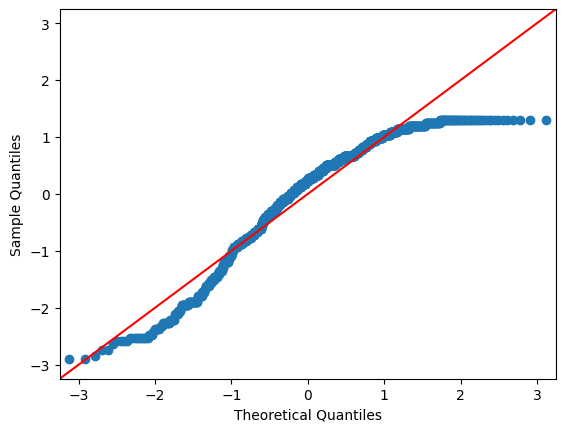

In [57]:
sm.qqplot(dfs['Age'],line='45')
plt.show()